In [7]:
#1
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.MNIST(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.MNIST(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.silu = nn.SiLU()
        self.mp = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(320, 160)
        self.fc2 = nn.Linear(160, 10) #New Fully Connected Layer

    def forward(self, x):
        in_size = x.size(0)
        x = self.silu(self.mp(self.conv1(x))) #Change Activation Function To Swish
        x = self.silu(self.mp(self.conv2(x)))
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.Adam(model.parameters(), lr=0.001) #Manipulating Learning Rate Runtime


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).data
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

<ipython-input-7-830486ecc6e4>:52: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300290
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.225690
Train Epoch: 1 [1280/60000 (2%)]	Loss: 1.952269
Train Epoch: 1 [1920/60000 (3%)]	Loss: 1.206007
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.755802
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.783099
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.360393
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.318729
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.356502
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.283337
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.363479
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.277249
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.396891
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.181042
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.236211
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.177769
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.240315
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.526826
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.148312
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.186989
Train Epoch: 1 [12800/60000 (

<ipython-input-7-830486ecc6e4>:80: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.0692, Accuracy: 9794/10000 (98%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.038114
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.044663
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.052451
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.016864
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.138004
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.023957
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.029289
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.035565
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.057528
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.012366
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.152275
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.196180
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.057040
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.026543
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.047169
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.136971
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.027238
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.093160
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.074491
Train Epoch: 2 [12

Layer의 개수가 너무 많다면 파라미터의 수가 많아져 과잉 적합이 일어날 가능성이 높다. 따라서 과잉 적합이 일어나지 않을 정도로 적당한 Layer의 개수를 정하는 것이 중요하다. 또한, CNN 모델의 맨 위에 Fully Connected Layer를 새로 추가하여 Convolution과 Pooling Layer를 모두 통과한 후의 데이터 셋에 대한 학습에 성능을 높일 수 있다. Kernal 개수의 경우 Early Stopping 방법을 이용하여 가장 적절한 kernal의 개수를 확인할 수 있다. Validation Set에서 일정 수준에서 모델의 성능이 개선되지 않을 때 학습을 중지하여 적절한 Kernal의 개수를 구할 수 있다.  
  
일반적으로 ReLU 함수가 좋은 성능을 내는 경우가 많다. ReLU 함수는 연산이 간단하고 빠르고, Gradient Vanishing 문제를 해결해주기 때문이다. 하지만 복잡한 데이터 셋의 경우 새로운 Swish 함수를 활성 함수로서 기용해보는 등의 시도를 해볼 수 있다.  
  
일반적으로 Fine Tuning을 할 때에는 초기 학습률을 낮게 설정하여 학습을 시작하고, 점차 학습률을 높여가며 모델을 학습시킨다.  
  
NLL Loss, Cross Entropy Loss 함수는 MSE 함수보다 오차에 훨씬 민감하다. 따라서 학습 성능을 높이는 데에 일조한다.

In [11]:
#2
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# Training settings
batch_size = 64

# MNIST Dataset
train_dataset = datasets.CIFAR10(root='./data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.CIFAR10(root='./data/',
                              train=False,
                              transform=transforms.ToTensor())

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)


class InceptionA(nn.Module):

    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        self.branch1x1 = nn.Conv2d(in_channels, 16, kernel_size=1)

        self.branch5x5_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch5x5_2 = nn.Conv2d(16, 24, kernel_size=5, padding=2)

        self.branch3x3dbl_1 = nn.Conv2d(in_channels, 16, kernel_size=1)
        self.branch3x3dbl_2 = nn.Conv2d(16, 24, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = nn.Conv2d(24, 24, kernel_size=3, padding=1)

        self.branch_pool = nn.Conv2d(in_channels, 24, kernel_size=1)

    def forward(self, x):
        branch1x1 = self.branch1x1(x)

        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)

        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)

        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)

        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(88, 20, kernel_size=5)

        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)

        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(2200, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = F.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = F.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)  # flatten the tensor
        x = self.fc(x)
        return F.log_softmax(x)


model = Net()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)


def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target)
        output = model(data)
        # sum up batch loss
        test_loss += F.nll_loss(output, target, size_average=False).item()
        # get the index of the max log-probability
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


for epoch in range(1, 10):
    train(epoch)
    test()

Files already downloaded and verified


<ipython-input-11-03d11a01b394>:87: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Train Epoch: 1 [0/50000 (0%)]	Loss: 2.298869
Train Epoch: 1 [640/50000 (1%)]	Loss: 2.288707
Train Epoch: 1 [1280/50000 (3%)]	Loss: 2.295912
Train Epoch: 1 [1920/50000 (4%)]	Loss: 2.286850
Train Epoch: 1 [2560/50000 (5%)]	Loss: 2.309788
Train Epoch: 1 [3200/50000 (6%)]	Loss: 2.311899
Train Epoch: 1 [3840/50000 (8%)]	Loss: 2.297761
Train Epoch: 1 [4480/50000 (9%)]	Loss: 2.292305
Train Epoch: 1 [5120/50000 (10%)]	Loss: 2.280048
Train Epoch: 1 [5760/50000 (12%)]	Loss: 2.303326
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.307884
Train Epoch: 1 [7040/50000 (14%)]	Loss: 2.303436
Train Epoch: 1 [7680/50000 (15%)]	Loss: 2.280264
Train Epoch: 1 [8320/50000 (17%)]	Loss: 2.291393
Train Epoch: 1 [8960/50000 (18%)]	Loss: 2.296426
Train Epoch: 1 [9600/50000 (19%)]	Loss: 2.245892
Train Epoch: 1 [10240/50000 (20%)]	Loss: 2.257543
Train Epoch: 1 [10880/50000 (22%)]	Loss: 2.253107
Train Epoch: 1 [11520/50000 (23%)]	Loss: 2.177447
Train Epoch: 1 [12160/50000 (24%)]	Loss: 2.223927
Train Epoch: 1 [12800/50000 

<ipython-input-11-03d11a01b394>:115: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  data, target = Variable(data, volatile=True), Variable(target)
/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.8357, Accuracy: 3450/10000 (34%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.748898
Train Epoch: 2 [640/50000 (1%)]	Loss: 1.900645
Train Epoch: 2 [1280/50000 (3%)]	Loss: 1.831611
Train Epoch: 2 [1920/50000 (4%)]	Loss: 1.889436
Train Epoch: 2 [2560/50000 (5%)]	Loss: 1.938959
Train Epoch: 2 [3200/50000 (6%)]	Loss: 2.035096
Train Epoch: 2 [3840/50000 (8%)]	Loss: 1.819019
Train Epoch: 2 [4480/50000 (9%)]	Loss: 1.882776
Train Epoch: 2 [5120/50000 (10%)]	Loss: 1.908808
Train Epoch: 2 [5760/50000 (12%)]	Loss: 1.894607
Train Epoch: 2 [6400/50000 (13%)]	Loss: 2.084650
Train Epoch: 2 [7040/50000 (14%)]	Loss: 1.805374
Train Epoch: 2 [7680/50000 (15%)]	Loss: 1.614092
Train Epoch: 2 [8320/50000 (17%)]	Loss: 1.791877
Train Epoch: 2 [8960/50000 (18%)]	Loss: 1.570138
Train Epoch: 2 [9600/50000 (19%)]	Loss: 1.978603
Train Epoch: 2 [10240/50000 (20%)]	Loss: 1.846412
Train Epoch: 2 [10880/50000 (22%)]	Loss: 1.813881
Train Epoch: 2 [11520/50000 (23%)]	Loss: 1.750926
Train Epoch: 2 [1

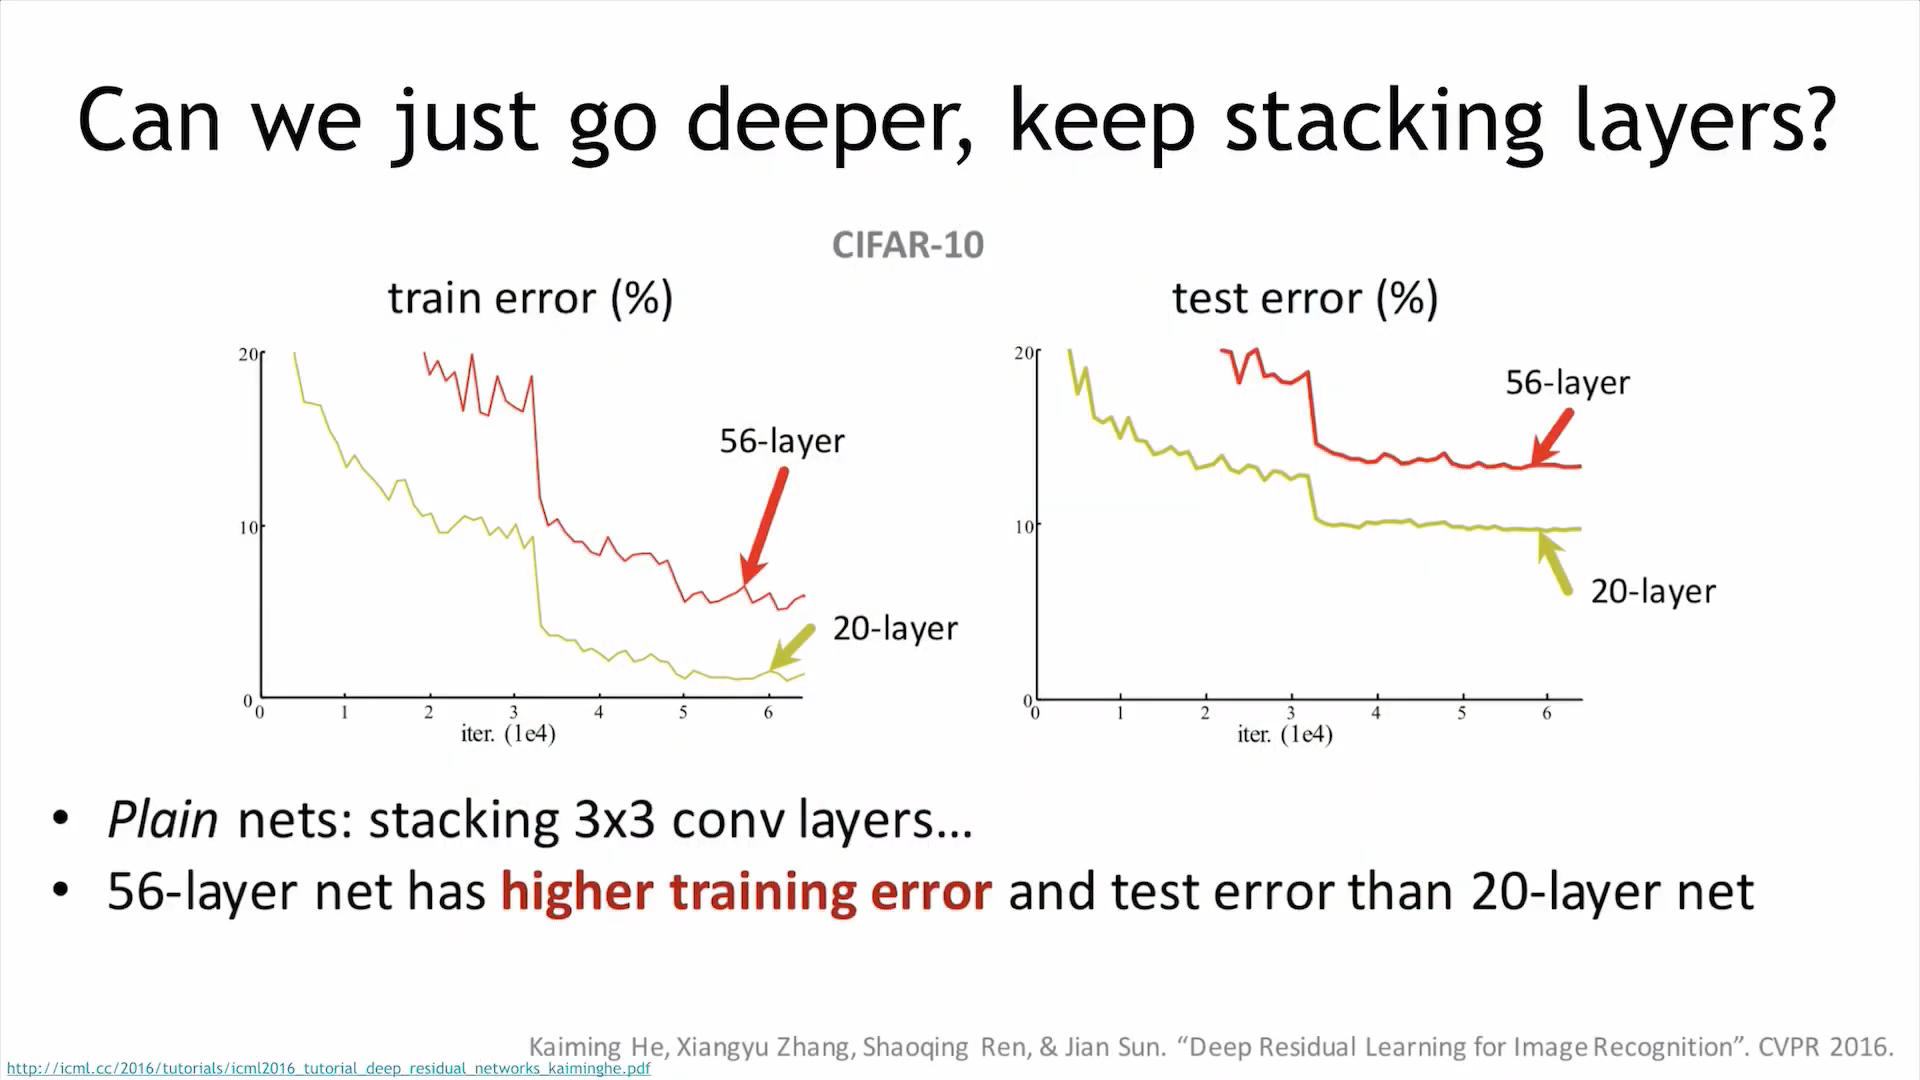

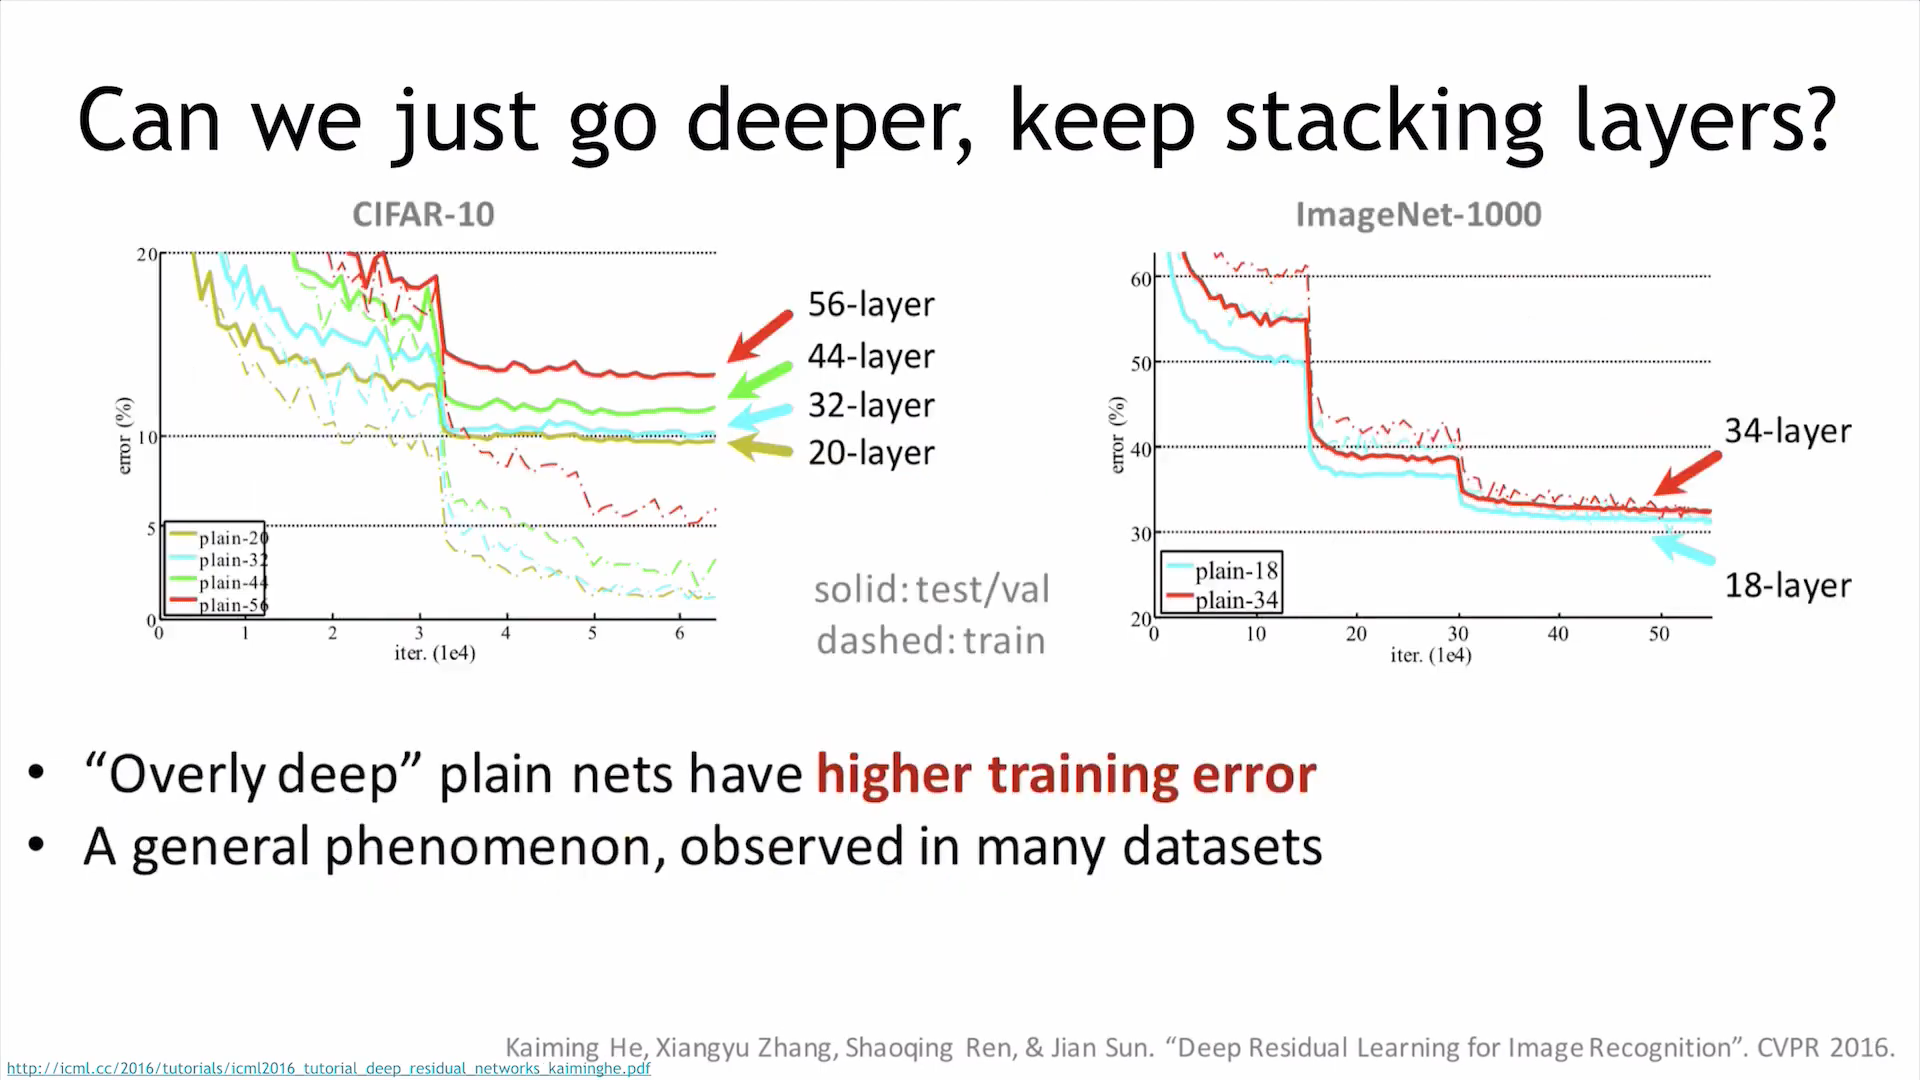

코드에서 확인했듯이 모듈을 1개 이용했을 때보다는 2개 이용했을 때 더 좋은 성능을 냈다. 그렇다면 모듈의 개수가 무작정 많아진다고 해서 성능이 좋아질까? 안타깝지만 아니다. 위의 그래프에서 확인할 수 있듯이 56 Layers일 때 20 Layers보다 못한 성능을 보였다. 혹시나 56 Layers가 일반화 성능은 더 좋을 수도 있지 않을까? 오른쪽의 Test Error 그래프를 살펴보면 이번에도 20 Layers의 성능이 56 Layers의 성능보다 좋은 것을 확인할 수 있다. 왜 이런 것일까? 우리가 MLP에서도 배웠듯이 Layer의 수가 늘어난다고 해서 능사가 아니다. Layer의 수가 늘어나면 다음과 같은 현상이 발생한다. 먼저 계산량이 굉장히 많아진다. 학습의 성능과는 별개로 모델의 학습에 걸리는 시간이 굉장히 오래 걸린다. 또한 Layer가 깊어지면 Gradient Vanishing 문제가 발생할 수 있다.

가장 중요하게 Degradation Problem이 발생한다 Degradation Problem은 네트워크 깊이가 깊어질수록, 즉 층이 쌓일수록 성능이 저하되는 현상을 말한다. 이는 매우 깊은 네트워크에서 발생할 가능성이 높다. 이러한 현상이 발생하는 이유는, 일반적으로 층이 쌓일수록 뒤쪽 층들이 더 어려운 학습을 담당하기 때문이다. 그리고 만약에 층이 충분히 깊어진다면, 이러한 학습의 어려움으로 인해 네트워크의 성능이 오히려 떨어질 수 있다. 이를 해결하기 위해 ResNet 같은 Shortcut Connection을 이용하여 이전 Layer의 정보를 새로운 Layer에 효과적으로 전달해서 성능 저하를 줄일 수 있다.